In [12]:
!pip install qiskit
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.9 MB/s eta 0:00:00


# Import qiskit

In [2]:
from qiskit import QuantumCircuit

# Creating a circut

## Create a simple quantum ciruit

Create a Quantum Circuit acting on a quantum register of three qubits

In [60]:
circ = QuantumCircuit(3)

## Example of a quantum circuit that makes a three-qubit GHZ state
Greenberger–Horne–Zeilinger state is a certain type of entangled quantum state that involves at least three subsystems (qubits). GHZ devised a single 3-spin state on which a single measurement is sufficient to test the local hidden variables hypothesis.
A hidden-variable theory is a deterministic physical model which seeks to explain the probabilistic nature of quantum mechanics by introducing additional variables.

|ψ⟩=(|000⟩+|111⟩)/√2.

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to |0⟩. To make the GHZ state, we apply the following gates:

### The gate we look at

- A Hadamard gate H on qubit 0, which puts it into the superposition state (|0⟩+|1⟩)/√2.
- A controlled-Not operation (CX) between qubit 0 and qubit 1.
- A controlled-Not operation between qubit 0 and qubit 2

In [61]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# Visualize the circuit

In [62]:
circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In this circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are n qubits, and qubit j is labeled as Qj. Qiskit uses an ordering in which the nth qubit is on the left side of the tensor product, so that the basis vectors are labeled as Qn−1⊗⋯⊗Q1⊗Q0.

For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as |100⟩, whereas many physics textbooks would represent it as |001⟩.

This difference in labeling affects the way multi-qubit operations are represented as matrices.

# Simulating circuits using Qiskit Aer

Qiskit Aer is the package used for simulating quantum circuits. It provides many different backends for doing a simulation.

## Statevector backend

The most common backend in Qiskit Aer is the statevector_simulator. This simulator returns the quantum state, which is a complex vector of dimensions 2n, where n is the number of qubits (so be careful using this as it will quickly get too large to run on your machine).

To run the above circuit using the statevector simulator, first you need to import Aer and then set the backend to statevector_simulator.

In [63]:
# Import Aer
from qiskit_aer import StatevectorSimulator
from qiskit import transpile

# Construct an ideal simulator
sim_statevector  = StatevectorSimulator()


Now that we have chosen the backend, it’s time to compile and run the quantum circuit. In Qiskit we provide the execute function for this. execute returns a job object that encapsulates information about the job submitted to the backend.

In [64]:
# Run the quantum circuit on a statevector simulator backend
job_statevector = sim_statevector.run(circ)

When you run a program, a job object is made that has the following two useful methods: job.status() and job.result(), which return the status of the job and a result object, respectively.

Note: Jobs run asynchronously, but when the result method is called, it switches to synchronous and waits for it to finish before moving on to another task.#

In [65]:
result = job_statevector.result()

The results object contains the data and Qiskit provides the method result.get_statevector(circ) to return the state vector for the quantum circuit.

In [66]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


Qiskit also provides a visualization toolbox to allow you to view these results.

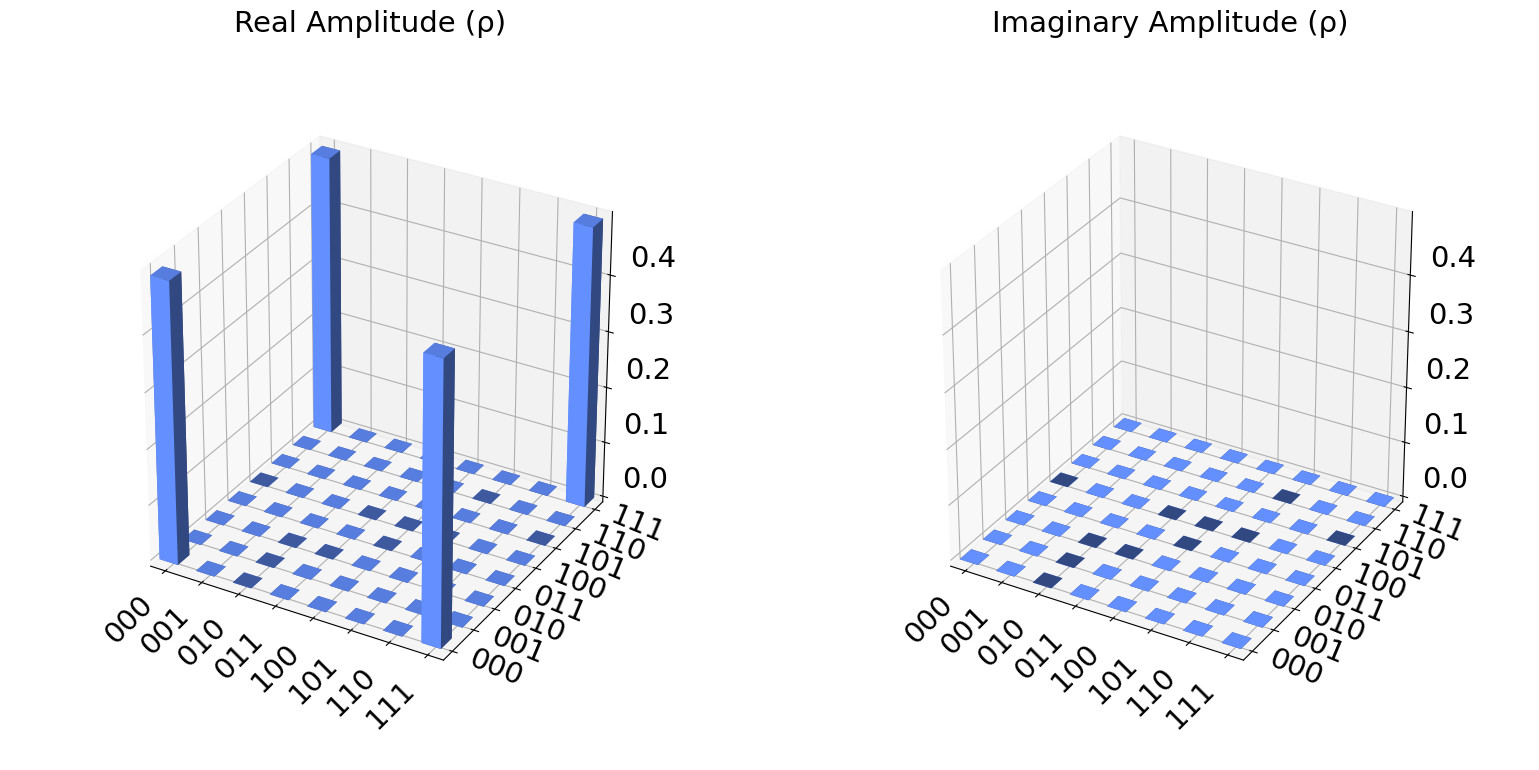

In [67]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

## AER backend

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by measuring each qubit (usually in the computational |0⟩,|1⟩ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits.

For example, suppose we make independent measurements on each qubit of the three-qubit GHZ state

|ψ⟩=|000⟩+|111⟩)/2–√, and let xyz denote the bitstring that results. Recall that, under the qubit labeling used by Qiskit, x would correspond to the outcome on qubit 2, y to the outcome on qubit 1, and z to the outcome on qubit 0.

Note: This representation of the bitstring puts the most significant bit (MSB) on the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way (qubit representing the MSB has index 0), which is why Qiskit uses a non-standard tensor product order.

Recall the probability of obtaining outcome xyz is given by

Pr(xyz)=|⟨xyz|ψ⟩|2 and as such for the GHZ state probability of obtaining 000 or 111 are both 1/2.

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend.

In [69]:
circ.measure_all()

#drawing the circuit
circ.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits.

To simulate this circuit, we use the qasm_simulator in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate Pr(000)), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the execute function, via the shots keyword.

In [73]:
from qiskit_aer import AerSimulator

# Use Aer's qasm_simulator
backend_sim = AerSimulator()

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
circ = transpile(circ, backend_sim)

# Run and get counts
result = backend_sim.run(circ).result()
counts = result.get_counts(circ)

Once you have a result object, you can access the counts via the function get_counts(circuit). This gives you the aggregated binary outcomes of the circuit you submitted.

In [74]:
print(counts)

{'111': 535, '000': 489}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function plot_histogram, which allows you to view the outcomes.

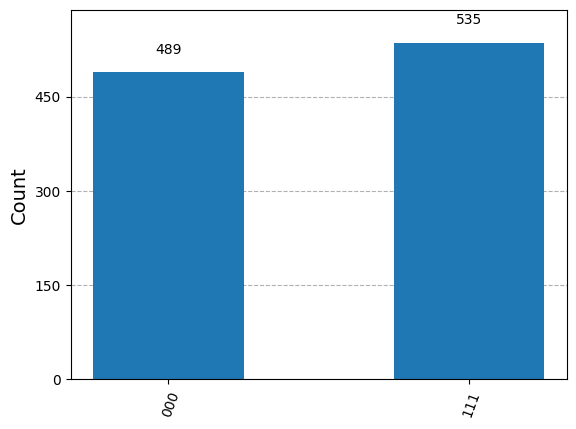

In [75]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated outcome probabilities Pr(000) and Pr(111) are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated).

# Other simulators

Test out other simulators and determine the results

## Simulation Options

The simulation method is set using the method kwarg. A list supported simulation methods can be returned using available_methods(), these are


1.   "automatic": Default simulation method. Select the simulation method automatically based on the circuit and noise model.
2.   "statevector": A dense statevector simulation that can sample measurement outcomes from ideal circuits with all measurements at end of the circuit. For noisy simulations each shot samples a randomly sampled noisy circuit from the noise model.
3."density_matrix": A dense density matrix simulation that may sample measurement outcomes from noisy circuits with all measurements at end of the circuit.
4. "stabilizer": An efficient Clifford stabilizer state simulator that can simulate noisy Clifford circuits if all errors in the noise model are also Clifford errors.
5. "extended_stabilizer": An approximate simulated for Clifford + T circuits based on a state decomposition into ranked-stabilizer state. The number of terms grows with the number of non-Clifford (T) gates.

6. "matrix_product_state": A tensor-network statevector simulator that uses a Matrix Product State (MPS) representation for the state. This can be done either with or without truncation of the MPS bond dimensions depending on the simulator options. The default behaviour is no truncation.

7. "unitary": A dense unitary matrix simulation of an ideal circuit. This simulates the unitary matrix of the circuit itself rather than the evolution of an initial quantum state. This method can only simulate gates, it does not support measurement, reset, or noise.

8. "superop": A dense superoperator matrix simulation of an ideal or noisy circuit. This simulates the superoperator matrix of the circuit itself rather than the evolution of an initial quantum state. This method can simulate ideal and noisy gates, and reset, but does not support measurement.

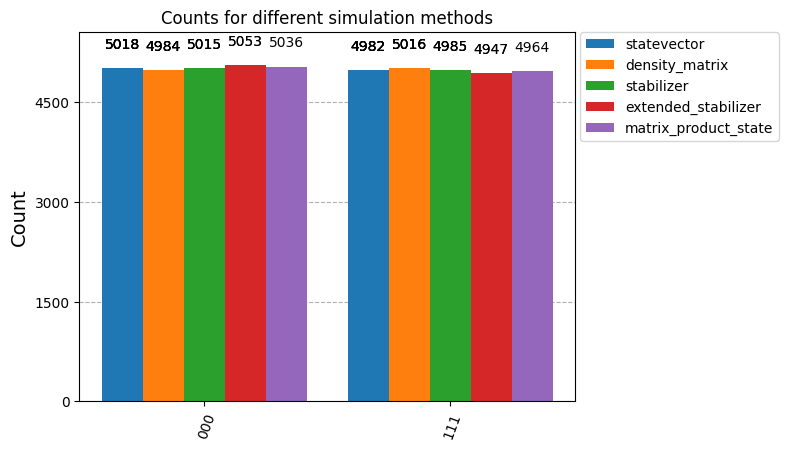

In [76]:
# Increase shots to reduce sampling variance
shots = 10000

# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])